# Week 4

In [89]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

from operator import itemgetter
%matplotlib inline

In [90]:
from operator import itemgetter

def orderDict(x: dict, desc=True):
    return sorted(x.items(), key=itemgetter(1), reverse=desc)

### Degree Distribution

The degree distribution, ```P(k)``` of a network is the number of nodes of degree ```k```, divided by the total number of nodes, i.e.:

```P(k) = (# nodes with k-degree) / len(g.nodes())```

###### # Example 1

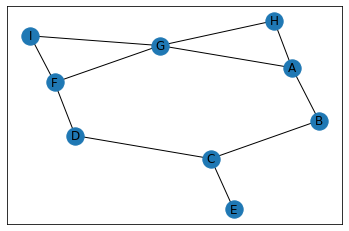

In [155]:
g = nx.Graph()
g.add_edges_from([
    ('A', 'H'), ('H', 'G'), ('I', 'G'), ('I', 'F'), 
    ('A', 'G'), ('G', 'F'), ('A', 'B'), ('F', 'D'), 
    ('B', 'C'), ('D', 'C'), ('C', 'E')
])

pos = nx.kamada_kawai_layout(g)
nx.draw_networkx(g, pos)

In [156]:
{'degrees': dict(g.degree()), 'sum': sum(dict(g.degree()).values())}

{'degrees': {'A': 3,
  'H': 2,
  'G': 4,
  'I': 2,
  'F': 3,
  'B': 2,
  'D': 2,
  'C': 3,
  'E': 1},
 'sum': 22}

In [157]:
nodes_cnt = len(g.nodes())
nodes_cnt

9

In [158]:
dg_values = sorted(set(dict(g.degree()).values()))
dg_values

[1, 2, 3, 4]

In [159]:
higher_degree = orderDict(dict(g.degree()))[0][1]
higher_degree

4

In [160]:
degrees = [degree for node, degree in g.degree()]
degrees

[3, 2, 4, 2, 3, 2, 2, 3, 1]

In [161]:
dg_cnt = {}

# We could start from degree zero, but we know theres no node with such degree
for d in range(1, higher_degree + 1): 
    dg_cnt[str(d)] = degrees.count(d)

dg_cnt

{'1': 1, '2': 4, '3': 3, '4': 1}

In [162]:
dg_dist = {}

for dg, cnt in dg_cnt.items():
    dg_dist[dg] = (cnt/nodes_cnt)

dg_dist

{'1': 0.1111111111111111,
 '2': 0.4444444444444444,
 '3': 0.3333333333333333,
 '4': 0.1111111111111111}

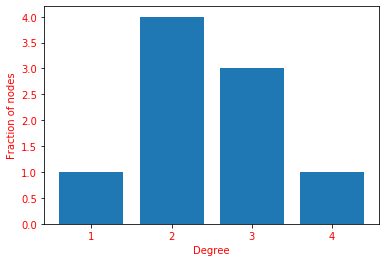

In [163]:
plt.bar(x=dg_cnt.keys(), height=dg_cnt.values())

[i.set_color("red") for i in plt.gca().get_xticklabels()]
[i.set_color("red") for i in plt.gca().get_yticklabels()]

plt.xlabel('Degree').set_color("red")
plt.ylabel('Fraction of nodes').set_color("red")


###### # Example 2

/home/f4119597/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


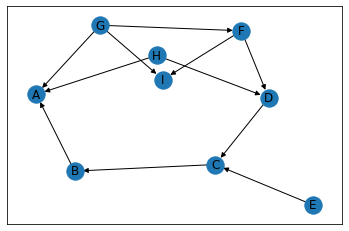

In [164]:
g = nx.DiGraph()
g.add_edges_from([
    ('H', 'A'), ('H', 'D'), ('G', 'I'), ('F', 'I'), 
    ('G', 'A'), ('G', 'F'), ('F', 'D'), ('B', 'A'), 
    ('C', 'B'), ('D', 'C'), ('E', 'C')
])

pos = nx.kamada_kawai_layout(g)
nx.draw_networkx(g, pos)

Note that here, we have nodes with ```in-degree = 0```

In [165]:
num_of_nodes = nx.number_of_nodes(g)
num_of_nodes

9

In [166]:
in_degrees_list = [degree for node, degree in g.in_degree()]
in_degrees_list

[0, 3, 2, 0, 2, 1, 1, 2, 0]

In [167]:
higher_degree = orderDict(dict(g.degree()))[0][1]
higher_degree

3

In [168]:
dg_cnt = {}
for d in range(0, higher_degree + 1): 
    dg_cnt[str(d)] = in_degrees_list.count(d)

dg_cnt

{'0': 3, '1': 2, '2': 3, '3': 1}

In [169]:
dg_dist = {}
for dg, cnt in dg_cnt.items():
    dg_dist[dg] = (cnt/nodes_cnt)

dg_dist

{'0': 0.3333333333333333,
 '1': 0.2222222222222222,
 '2': 0.3333333333333333,
 '3': 0.1111111111111111}

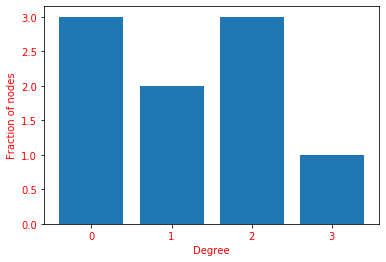

In [170]:
plt.bar(x=dg_cnt.keys(), height=dg_cnt.values())

[i.set_color("red") for i in plt.gca().get_xticklabels()]
[i.set_color("red") for i in plt.gca().get_yticklabels()]

plt.xlabel('Degree').set_color("red")
plt.ylabel('Fraction of nodes').set_color("red")

### Power Law

![power law](./media/powerlaw.png)

Can we come up with a model that generates a network that has a power law like degree distribution?

### Preferential Attachment Model

- Start with 2 nodes at time ```k = 0```;

- At each time ```k + 1```, add a new node with an edge connecting it to an existing node;


- The probability of a new node ```v``` connecting to a node ```u``` of degree ```d(u)``` is:
    ```d(u)/sum(g.degrees())```

###### # Example 3

![pref att model 1](./media/pamodel_01.png)

In [171]:
degree_1 = 1
degree_2 = 1
sum_degree = 2

# Probabilty of node 3 attaching to each node
p_3_to_1 = round(degree_1/sum_degree, 2)
p_3_to_2 = round(degree_2/sum_degree, 2)

{'prob_of_1': p_3_to_1, 'prob_of_2': p_3_to_2}

{'prob_of_1': 0.5, 'prob_of_2': 0.5}

![pref att model 2](./media/pamodel_02.png)

In [172]:
degree_1 = 1
degree_2 = 2
degree_3 = 1
sum_degree = 4

# Probabilty of node 4 attaching to node each node
p_4_to_1 = round(degree_1/sum_degree, 2)
p_4_to_2 = round(degree_2/sum_degree, 2)
p_4_to_3 = round(degree_3/sum_degree, 2)

{'prob_of_1': p_4_to_1, 'prob_of_2': p_4_to_2, 'prob_of_3': p_4_to_3}

{'prob_of_1': 0.25, 'prob_of_2': 0.5, 'prob_of_3': 0.25}

![pref att model 3](./media/pamodel_03.png)

In [173]:
degree_1 = 1
degree_2 = 2
degree_3 = 2
degree_4 = 1
sum_degree = 6

# Probabilty of node 5 attaching to node each node
p_5_to_1 = round(degree_1/sum_degree, 2)
p_5_to_2 = round(degree_2/sum_degree, 2)
p_5_to_3 = round(degree_3/sum_degree, 2)
p_5_to_4 = round(degree_4/sum_degree, 2)

{'prob_of_1': p_5_to_1, 'prob_of_2': p_5_to_2,
 'prob_of_3': p_5_to_3, 'prob_of_4': p_5_to_3}

{'prob_of_1': 0.17, 'prob_of_2': 0.33, 'prob_of_3': 0.33, 'prob_of_4': 0.33}

Few steps later...

![pref att model 4](./media/pamodel_04.png)

As the number of nodes increases, the degree distribution of the network under the Preferential Attachment Model approaches the Power Law ```P(k) = C * k^(-3)``` with ```constant C```;

The Pref. Attachment Model produces networks with degree distributions similar to real networks. "Rich Get Richer phenomenon"

###### # Example 4

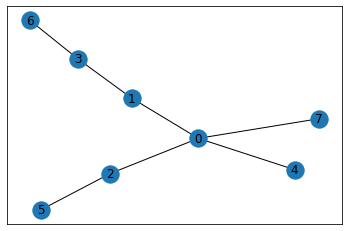

In [174]:
g = nx.barabasi_albert_graph(8, 1)
pos = nx.kamada_kawai_layout(g)
nx.draw_networkx(g, pos)

###### # Example 5

In [181]:
g = nx.barabasi_albert_graph(1000000, 1)

In [182]:
degrees = dict(g.degree())

In [183]:
degree_values = sorted(set(degrees.values()))

In [185]:
histogram = [list(degrees.values()).count(i)/float(nx.number_of_nodes(g)) for i in degree_values]

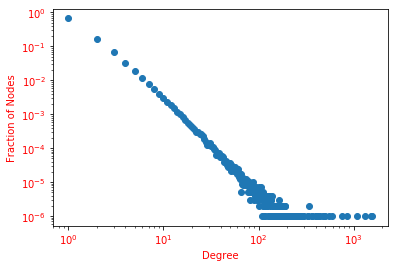

In [188]:
plt.plot(degree_values, histogram, 'o')

[i.set_color("red") for i in plt.gca().get_xticklabels()]
[i.set_color("red") for i in plt.gca().get_yticklabels()]


plt.xlabel('Degree').set_color('red')
plt.ylabel('Fraction of Nodes').set_color('red')
plt.xscale('log')
plt.yscale('log')
plt.show()

### ?

###### # Example 6

### Common neighbors
We define it as ```common(X,Y) = |N(X) inter N(Y)|```,
where N(X) is the set of neighbors of node X

###### # Example 1

In [2]:
g = nx.Graph()
g.add_edges_from(
    [
        ('A', 'B'), ('B', 'C'), ('B', 'D'), ('A', 'D'), 
        ('D', 'C'), ('A', 'E'), ('C', 'F'), ('E', 'F'), 
        ('E', 'G'), ('F', 'G'), ('G', 'H'), ('G', 'I')
    ]
)

/home/f4119597/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


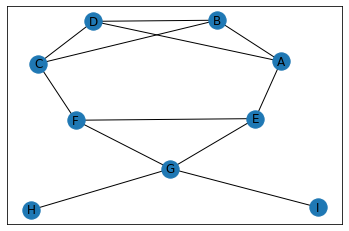

In [3]:
pos = nx.kamada_kawai_layout(g)
nx.draw_networkx(g, pos)

In [4]:
list(nx.common_neighbors(g, 'H', 'I'))

['G']

In [5]:
list(nx.common_neighbors(g, 'C', 'A'))

['B', 'D']

In [6]:
(
    list(nx.common_neighbors(g, 'G', 'A')),
    list(nx.common_neighbors(g, 'I', 'A'))
)

(['E'], [])

In [7]:
# all common neighbors
comm_neig = [(e[0], e[1], len(list(nx.common_neighbors(g, e[0], e[1])))) for e in nx.non_edges(g)]

comm_neig[:5]

[('A', 'H', 0), ('A', 'G', 1), ('A', 'C', 2), ('A', 'F', 1), ('A', 'I', 0)]

In [8]:
sorted(comm_neig, key=itemgetter(2), reverse=True)[:5]

[('A', 'C', 2), ('A', 'G', 1), ('A', 'F', 1), ('H', 'E', 1), ('H', 'F', 1)]

### Jaccard Coefficient

Number of neighbors normalized by the total number of neighbors

In [9]:
sorted(list(nx.jaccard_coefficient(g)), key=itemgetter(2), reverse=True)[:5]

[('H', 'I', 1.0),
 ('A', 'C', 0.5),
 ('H', 'E', 0.3333333333333333),
 ('H', 'F', 0.3333333333333333),
 ('E', 'I', 0.3333333333333333)]

### Resource Allocation Index

Fraction of a 'resource' that a node can send to another through their common neighbors

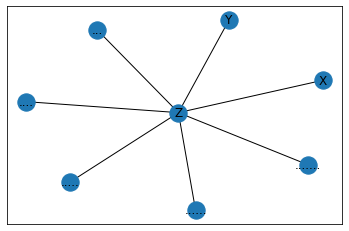

In [10]:
_g = nx.Graph()
_g.add_edges_from([('X', 'Z'), ('Z', 'Y'), 
                   ('Z', '...'), ('Z', '....'),
                   ('Z', '.....'), ('Z', '......'),
                   ('Z', '.......'), ])

nx.draw_networkx(_g, nx.kamada_kawai_layout(_g))

```X``` wants to sends 1 unit of information to ```Y```;

```X``` gives ```1/degree(X)``` to each of its neighbors;

```Z``` receives ```1/degree(X)``` of that information;

```Z``` fowards ```(1/degree(X))/degree(Z)``` to ```Y```